In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

<IPython.core.display.Javascript object>


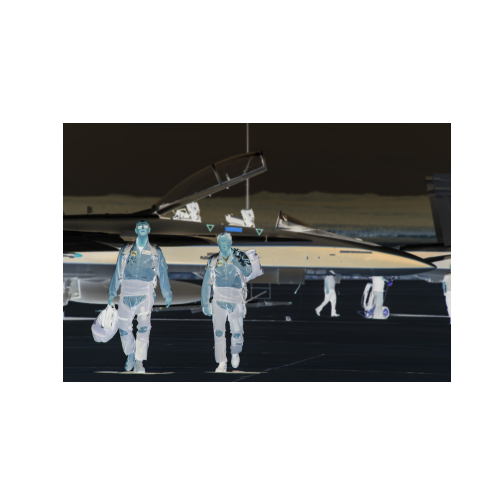

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 6047.5, 4031.5, -0.5)

In [44]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams.update({'font.size': 18})
A = imread(os.path.join('afrc2016-0195-196.jpg'))              # Load Image
B = np.mean(A, -1)                                             # Conver RGB to grayscale

plt.figure() 
plt.imshow(256-A)                                              # cmap = 'gray_r'
plt.axis('off')

<IPython.core.display.Javascript object>


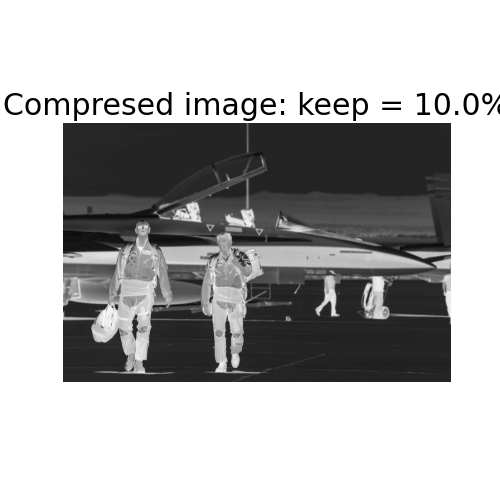

<IPython.core.display.Javascript object>


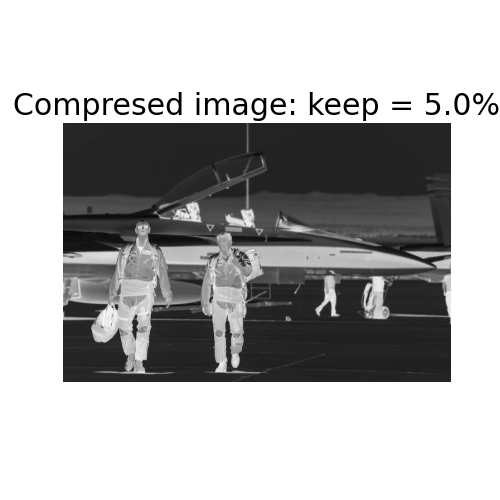

<IPython.core.display.Javascript object>


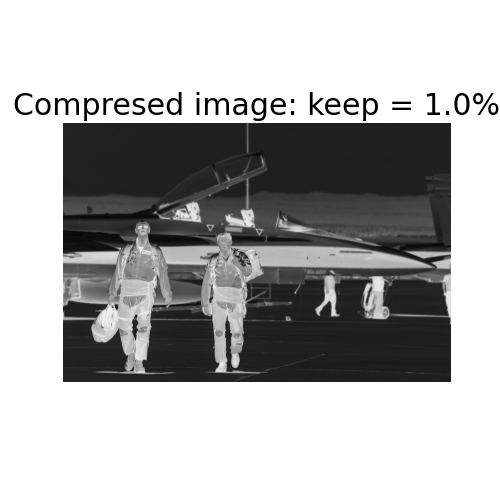

<IPython.core.display.Javascript object>


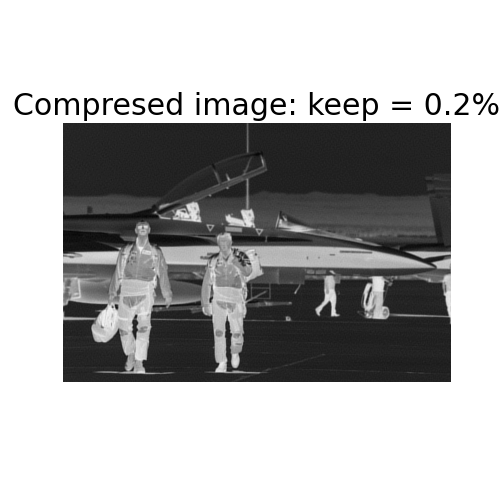

In [45]:
Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1)))                                 # Sort by magnitude

# Zero out all small coefficents and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh                                     # Find small indices
    Atlow = Bt*ind                                              # Thereshold small indeces
    Atlow = np.fft.ifft2(Atlow).real                            # Compresed image
    plt.figure()
    plt.imshow(256-Atlow, cmap='gray')
    plt.axis('off')
    plt.title('Compresed image: keep = ' + str(keep*100)+ '%')

<IPython.core.display.Javascript object>


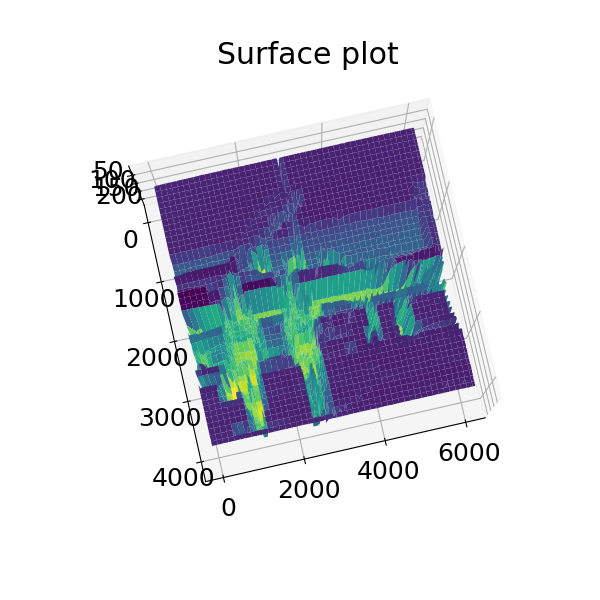

In [46]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['figure.figsize'] = [6, 6]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
X,Y = np.meshgrid(np.arange(1, np.shape(B)[1]+1),np.arange(1,np.shape(B)[0]+1))
ax.plot_surface(X[0::10,0::10],Y[0::10,0::10],256-B[0::10,0::10],cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
ax.mouse_init()
ax.view_init(200, 270)
plt.show()